In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## **Splitting Test data and Training Data into Columns** 

In [2]:
df_test = pd.read_csv('/Users/alex/Desktop/GIT/MLP_ASSSIGNMENT-1/NON_SEPARABLE_CLASSIFICATION/SPC-Testing.csv',sep='\s+',header=None,engine='python')
print('Test Data:')
display(df_test.head())
print()
df_train = pd.read_csv('/Users/alex/Desktop/GIT/MLP_ASSSIGNMENT-1/NON_SEPARABLE_CLASSIFICATION/SPC-Training.csv', sep ='\s+',header=None, engine='python')
print('Train Data:')
display(df_train.head())


Test Data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1.0,0.0,0.0,0.0,0.0,0.0,0.0



Train Data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X_train_df = df_train.iloc[:,:10]
y_train_df = df_train.iloc[:,10:]
X_test_df = df_test.iloc[:,:10]
y_test_df = df_test.iloc[:,10:]

### **Check whether data needs normalization**

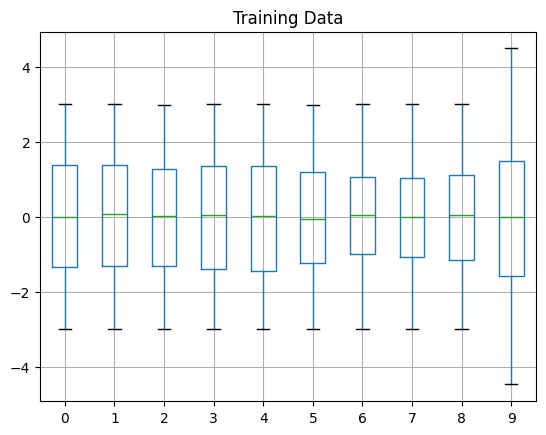

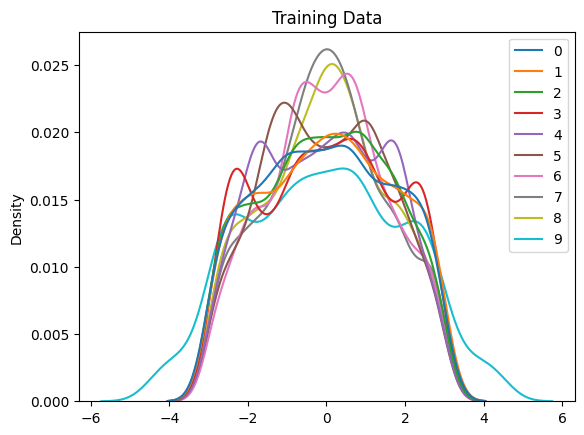

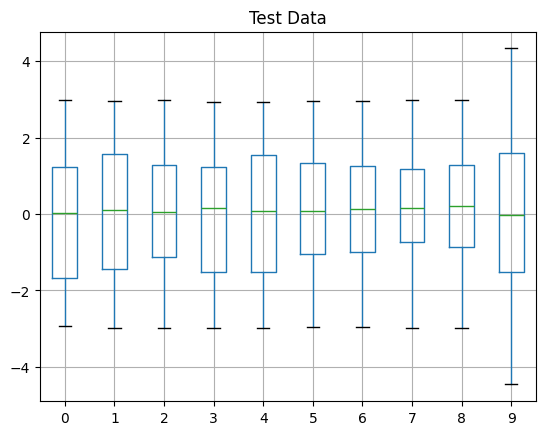

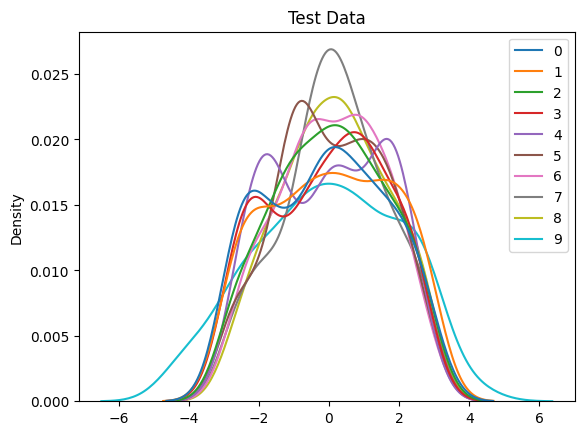

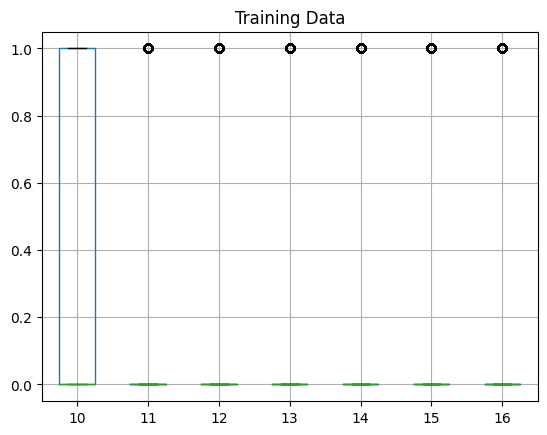

Text(0.5, 1.0, 'Training Data')

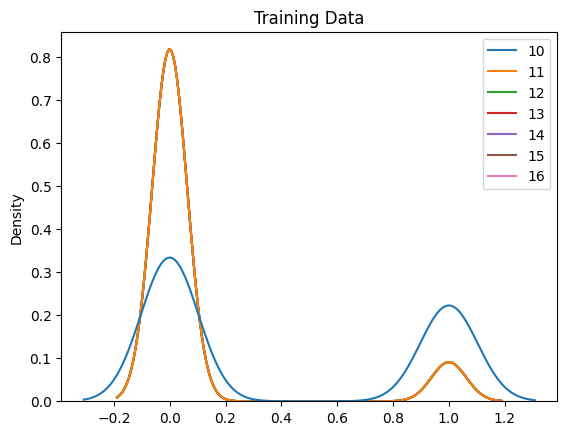

In [4]:
X_train_df.boxplot().set_title('Training Data')
plt.show()
sns.kdeplot(X_train_df).set_title('Training Data')
plt.show()
X_test_df.boxplot().set_title('Test Data')
plt.show()
sns.kdeplot(X_test_df).set_title('Test Data')
plt.show()
y_train_df.boxplot().set_title('Training Data')
plt.show()
sns.kdeplot(y_train_df).set_title('Training Data')

In [5]:
X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df.values
y_test = y_test_df.values

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
def make_model(neurons_first=40, neurons_second=64, dropout_rate=0.2, 
               l2_regularization=0.001, learning_rate=0.001):
    
    n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
    
    model = Sequential([
        Input(shape=(n_inputs,)),
        Dense(neurons_first, kernel_initializer='normal',
              kernel_regularizer=l2(l2_regularization), activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons_second, kernel_initializer='normal',
              kernel_regularizer=l2(l2_regularization), activation='relu'),
        Dropout(dropout_rate),
        Dense(n_outputs, activation='softmax')
    ])
    

    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                 loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(make_model, verbose = 0)
param_grid = {
    'model__neurons_first': [32, 64],
    'model__neurons_second': [32, 64, 128],
    'model__dropout_rate': [0.1, 0.3],
    'model__l2_regularization': [0.0001, 0.001, 0.01],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [16, 32, 64],
    'epochs': [100, 200]
}
grid = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1,
    verbose = 0
)
grid_result = grid.fit(X_train, y_train, verbose = 0)

print("Best Parameters :", grid_result.best_params_)
print("Best Parameters :", grid_result.best_score_)

KeyboardInterrupt: 

## **Build Model**

### **Training the model using best parameters**

In [68]:
from tensorflow.keras.regularizers import l2
def create_model(n_inputs, n_outputs, optimizer=Adam()):
    model = Sequential([
        Dense(40, input_dim=n_inputs, kernel_initializer='normal',kernel_regularizer=l2(0.001),  activation='relu'),
        Dropout(0.2),
        Dense(64,kernel_initializer='normal',kernel_regularizer=l2(0.001), activation='relu'),
        Dropout(0.2),
        Dense(n_outputs, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [69]:
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
model = create_model(n_inputs,n_outputs)
model.fit(X_train, y_train, verbose=0, epochs=300)
print(model.metrics_names)

['loss', 'compile_metrics']


## **Best score on training dataset** 

In [70]:
score = model.evaluate(X_train, y_train, verbose=0) 
print('Train loss:', score[0]) 
print('Train accuracy:', score[1]) 

Train loss: 0.17623047530651093
Train accuracy: 0.9635999798774719


## **Best score on testing dataset** 

In [76]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss:', score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.2664913833141327
Test Accuracy: 0.9200000166893005


## **Confusion Matrix to Understand Prediction Errors**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Figure size 1000x800 with 0 Axes>

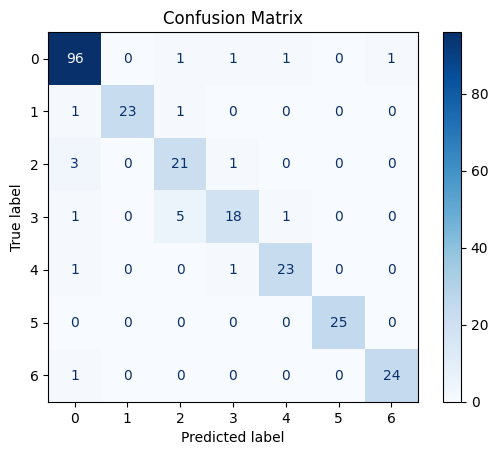

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

## **Class Distribution Analysis**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


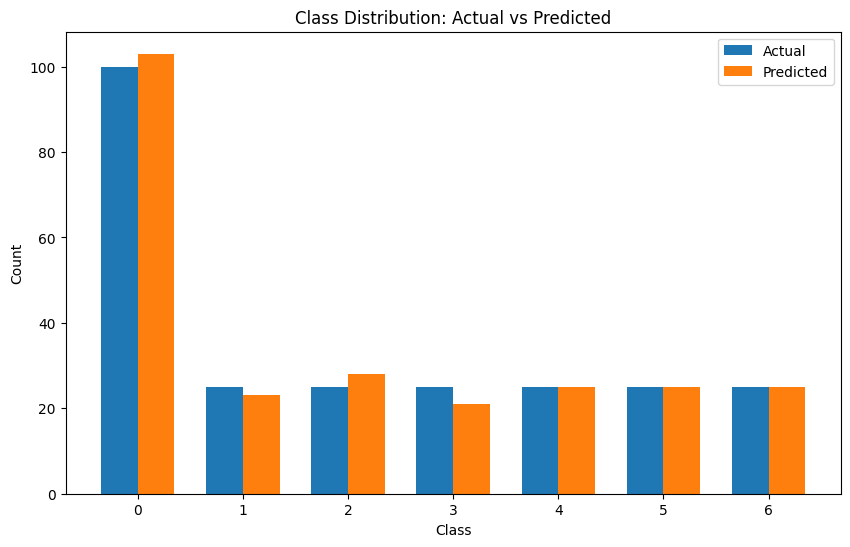

In [78]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

pred_counts = np.bincount(y_pred)
true_counts = np.bincount(y_true)

width = 0.35
x = np.arange(len(pred_counts))
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, true_counts, width, label='Actual')
plt.bar(x + width/2, pred_counts, width, label='Predicted')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution: Actual vs Predicted')
plt.xticks(x)
plt.legend()
plt.savefig('class_distribution.png', dpi=300)
plt.show()